# Setup Environment

In [0]:
!pip install scikit-learn

In [0]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

# Load Data and Explore

In [0]:
bst = pd.DataFrame(datasets.load_boston().data, columns= datasets.load_boston().feature_names)

In [0]:
bst.head()

In [0]:
print(datasets.load_boston().DESCR)

In [0]:
cali = datasets.fetch_california_housing

In [0]:
california = pd.DataFrame(cali().data, columns= cali().feature_names)

In [0]:
#the target value for the regression
target_list = pd.DataFrame(cali().target, columns=['AvHsVal'])
target_list

In [0]:
#append the average house value to the california dataframe
california = pd.concat([california, target_list], axis=1)

In [0]:
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvHsVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
california.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'AvHsVal'],
      dtype='object')

In [0]:
sns.pairplot(california)

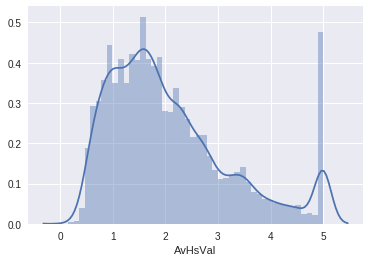

In [0]:
sns.distplot(california['AvHsVal'])

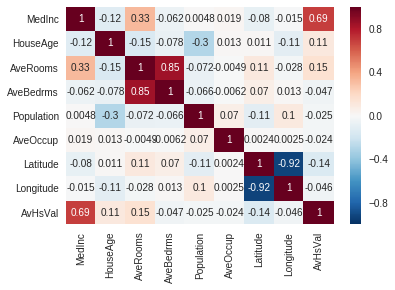

In [0]:
sns.heatmap(california.corr(), annot=True,)

# Linear Regression

In [0]:
X = california[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']]

In [0]:
y = california[['AvHsVal']]

In [0]:
#Train/Test Split Data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [0]:
#Create the linear model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
print(lr.intercept_)

[-0.40042073]


In [0]:
lr.coef_

array([[ 5.20204510e-01,  1.69602543e-02, -1.88796435e-01,
         8.97065975e-01,  2.21399828e-05, -5.16139736e-03]])

In [0]:
cdf=pd.DataFrame(lr.coef_.reshape((6,1)), X.columns, columns=['Coeff'] )

In [0]:
cdf

,Coeff
MedInc,0.520205
HouseAge,0.016960
AveRooms,-0.188796
AveBedrms,0.897066
Population,0.000022
AveOccup,-0.005161


# Create Predictions

In [0]:
predictions = lr.predict(X_test)

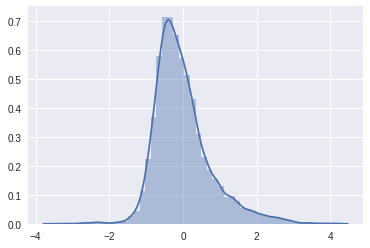

In [0]:
#Residuals Plot
sns.distplot(y_test - predictions)

Regression Evaluation Metrics

In [0]:
from sklearn import metrics

In [0]:
metrics.mean_absolute_error(y_test, predictions)

0.5730713412657924

In [0]:
metrics.mean_squared_error(y_test, predictions)

0.5930792362390577

In [0]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.7701163783734623